In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('sharebike.csv')

### 查看数据详情
#### 数据是每小时统计一次

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 大致含有2年左右的数据，以每天记24次算，大概453天，可见时间并不连续

In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012/12/19 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012/12/19 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012/12/19 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012/12/19 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012/12/19 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### 字段说明
#### 时间情况：日期+时间；季节1-4；是否节假日；是否工作日；
#### 天气情况：天气 1晴天，2阴天，3小雨雪，4大雨雪；温度；体感温度；湿度；风速；
#### 使用情况：非注册用户；注册用户；总计

### 类型和缺失情况
#### 无缺失，只有一个object对象，其他都是数值型

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 基本统计信息
#### 大致可获得一些信息：每小时最高使用977次，最低1次；平均小时注册用户使用率是非注册用户的3倍；
#### 温度、体感温度、湿度、风速的平均值与中位数很接近，说明这些数据的分布比较对称

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### 工作日与节假日是互斥的（当然这是理所当然的，这里再检查一下）

In [7]:
(df.holiday*df.workingday).sum()

0

### 预定义考察目标
0，首先，关于时间的前4列具有相关性，天气可能也存在某些相关性，总计与注册/非注册数也有相关性<br/>
1，按月份/季节算，可展示用户使用情况变化<br/>
2，一天内用户使用情况变化<br/>
3，按是否为节假日，统计用户使用情况<br/>
4，用户使用情况随天气（温度、湿度……）的变化<br/>
### 预定义特征处理
1，节假日与工作日只需要一列<br/>
2，日期与时间有了季节描述，可转化为时间段特征<br/>

#### 转换日期类型，作为新特征

In [8]:
df['time']=pd.to_datetime(df.datetime)

#### 提取年、月等

In [9]:
# 月份
df['Month']=df['time'].apply(lambda x:x.month)
# 年份
df['Year']=df['time'].apply(lambda x:x.year)
# 小时
df['Hour']=df['time'].apply(lambda x:x.hour)

## 可视化不同时间尺度下，总使用量的变化情况
### 每小时总使用量
#### 不同季节：夏秋最多，春季最少，正偏（离群点偏大），且工作日正偏更严重，春季正偏都明显，表明春天存在节假日游玩的黄金时段，可在春天相应时间段内加大推广
#### 不同月份：跟季节一致，1-4月都有较明显正偏，其他月份只有工作日有明显正偏
#### 是否工作日：工作日与节假日的每日总使用量差不多，工作日离群点更多
#### 不同小时：对于工作日来说，一天内早晚班是高峰期，而对节假日来说，则是从中午到傍晚使用较多。推广时段也渐渐明晰


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Hour'), Text(0.5, 1.0, 'Count vs Hour')]

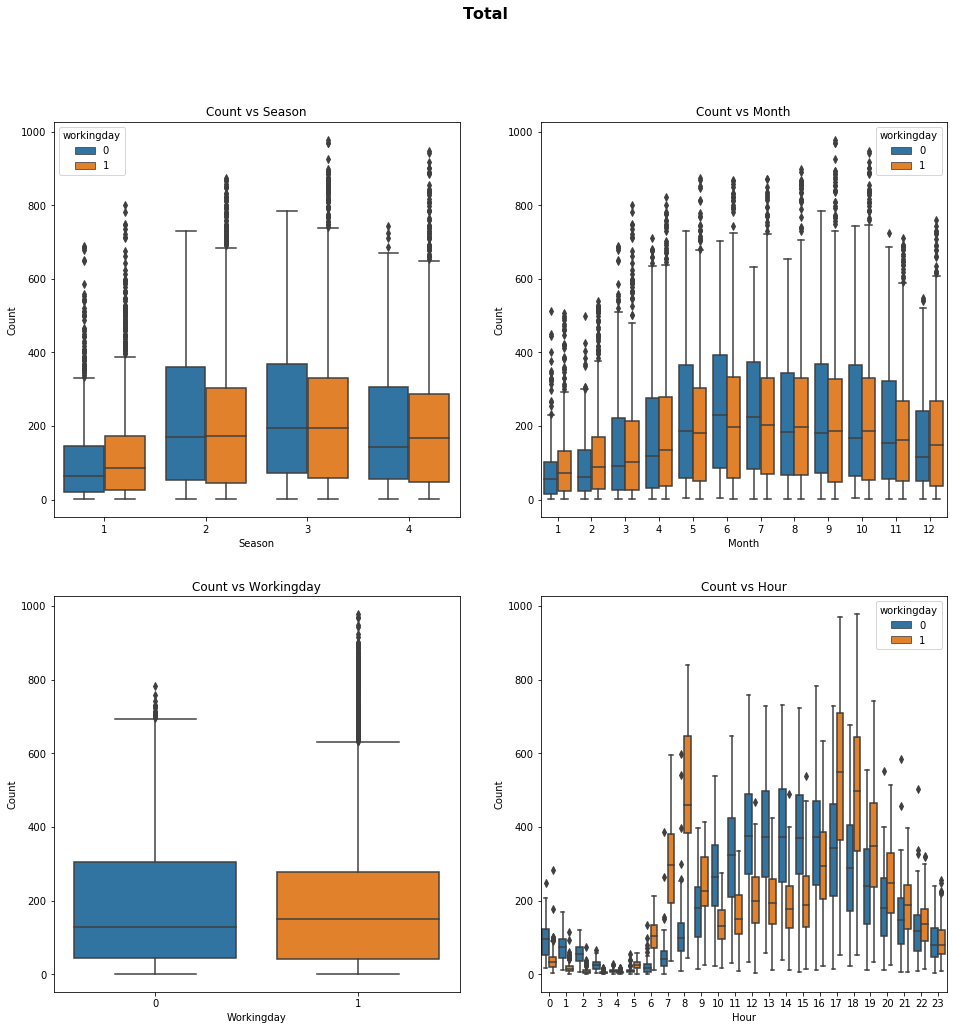

In [10]:
# 总使用量随不同时间尺度的变化
fig=plt.figure(figsize=(16,16))
fig.suptitle("Total",fontsize=16,fontweight="bold")
# 季节
ax1=fig.add_subplot(2,2,1)
sns.boxplot(x='season',y='count',data=df,hue='workingday')
ax1.set(ylabel="Count",xlabel="Season",title="Count vs Season")
# 月份
ax2=fig.add_subplot(2,2,2)
sns.boxplot(x='Month',y='count',data=df,hue='workingday')
ax2.set(ylabel="Count",xlabel="Month",title="Count vs Month")
# 工作日与否
ax3=fig.add_subplot(2,2,3)
sns.boxplot(x='workingday',y='count',data=df)
ax3.set(ylabel="Count",xlabel="Workingday",title="Count vs Workingday")

# 小时
ax4=fig.add_subplot(2,2,4)
sns.boxplot(x='Hour',y='count',data=df,hue='workingday')
ax4.set(ylabel="Count",xlabel="Hour",title="Count vs Hour")



### 每小时非注册用户使用量，可以发现跟总使用量有很大的不同
#### 图1：非注册用户也是夏秋使用多，且始终偏爱节假日，在春天和冬天节假日的正偏非常严重，超过工作日
#### 图2：跟图1一致
#### 图3：与总使用量很不同，4个图都表明非注册用户对节假日的偏爱
#### 图4：每天从早上9点到晚上8,9点使用较多，节假日峰值在下午2点，工作日在下午5点有不明显的峰值

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Hour'), Text(0.5, 1.0, 'Count vs Hour')]

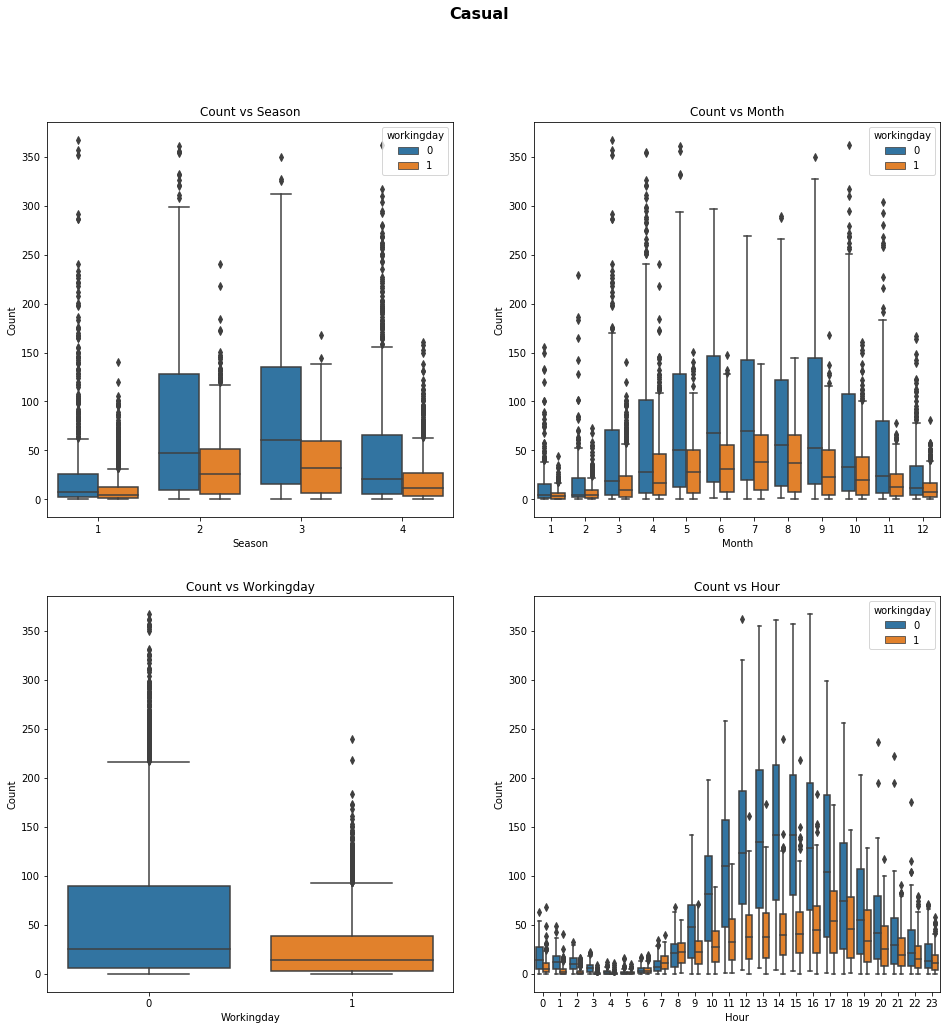

In [11]:
fig=plt.figure(figsize=(16,16))
fig.suptitle("Casual",fontsize=16,fontweight="bold")
# 季节
ax1=fig.add_subplot(2,2,1)
sns.boxplot(x='season',y='casual',data=df,hue='workingday')
ax1.set(ylabel="Count",xlabel="Season",title="Count vs Season")
# 月份
ax2=fig.add_subplot(2,2,2)
sns.boxplot(x='Month',y='casual',data=df,hue='workingday')
ax2.set(ylabel="Count",xlabel="Month",title="Count vs Month")
# 工作日与否
ax3=fig.add_subplot(2,2,3)
sns.boxplot(x='workingday',y='casual',data=df)
ax3.set(ylabel="Count",xlabel="Workingday",title="Count vs Workingday")

# 小时
ax4=fig.add_subplot(2,2,4)
sns.boxplot(x='Hour',y='casual',data=df,hue='workingday')
ax4.set(ylabel="Count",xlabel="Hour",title="Count vs Hour")


### 注册用户
#### 注册用户偏爱工作日，工作日使用高峰是早晚班（影响总使用分布图），节假日峰值从中午到傍晚

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Hour'), Text(0.5, 1.0, 'Count vs Hour')]

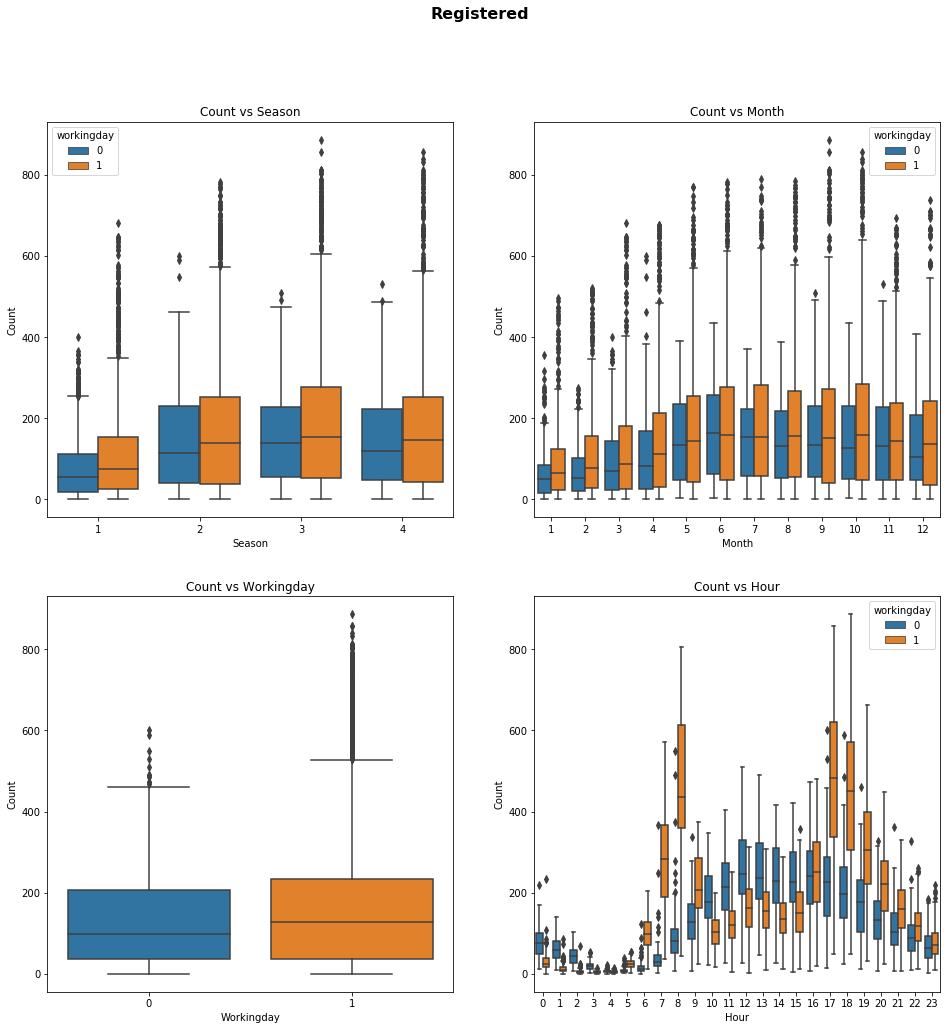

In [12]:
fig=plt.figure(figsize=(16,16))
fig.suptitle("Registered",fontsize=16,fontweight="bold")
# 季节
ax1=fig.add_subplot(2,2,1)
sns.boxplot(x='season',y='registered',data=df,hue='workingday')
ax1.set(ylabel="Count",xlabel="Season",title="Count vs Season")
# 月份
ax2=fig.add_subplot(2,2,2)
sns.boxplot(x='Month',y='registered',data=df,hue='workingday')
ax2.set(ylabel="Count",xlabel="Month",title="Count vs Month")
# 工作日与否
ax3=fig.add_subplot(2,2,3)
sns.boxplot(x='workingday',y='registered',data=df)
ax3.set(ylabel="Count",xlabel="Workingday",title="Count vs Workingday")

# 小时
ax4=fig.add_subplot(2,2,4)
sns.boxplot(x='Hour',y='registered',data=df,hue='workingday')
ax4.set(ylabel="Count",xlabel="Hour",title="Count vs Hour")

## 同比增长

In [30]:
Year_total=df.groupby(by=['Year']).sum().loc[:,['casual','registered','count']]
Year_avg=df.groupby(by=['Year']).mean().loc[:,['casual','registered','count']]

In [31]:
Year_total,Year_avg

(      casual  registered    count
 Year                             
 2011  155817      626162   781979
 2012  236318     1067179  1303497,         casual  registered       count
 Year                                  
 2011  28.73792  115.485430  144.223349
 2012  43.25000  195.310944  238.560944)

### 单车使用总量同比增长
注册用户增长量是非注册用户增长的5倍多，总用户使用量增加67%

In [27]:
Year_total.iloc[1]-Year_total.iloc[0]

casual         80501
registered    441017
count         521518
dtype: int64

### 平均每小时使用量同比增长
增长情况与总量基本一致

In [32]:
Year_avg.iloc[1]-Year_avg.iloc[0]

casual        14.512080
registered    79.825515
count         94.337595
dtype: float64

## 环比增长

In [34]:
Month_total=df.groupby(by=['Year','Month']).sum().loc[:,['casual','registered','count']]
Month_avg=df.groupby(by=['Year','Month']).mean().loc[:,['casual','registered','count']]
Month_total,Month_avg

(            casual  registered   count
 Year Month                            
 2011 1        2008       21544   23552
      2        3776       29068   32844
      3        7910       30825   38735
      4       12229       38288   50517
      5       15865       63848   79713
      6       19600       70176   89776
      7       26145       66703   92848
      8       17580       65716   83296
      9       18311       60793   79104
      10      17159       62363   79522
      11      10155       60734   70889
      12       5079       56104   61183
 2012 1        5244       51088   56332
      2        5521       60748   66269
      3       17146       77620   94766
      4       27584       89301  116885
      5       25420       95014  120434
      6       28974      101983  130957
      7       24802       96967  121769
      8       28290      101930  130220
      9       27590      105835  133425
      10      20928      106984  127912
      11      15198       90353  105551


In [43]:
total_increase=Month_total.iloc[12:].values-Month_total.iloc[:12].values
total_increase

data=pd.DataFrame(data=total_increase,columns=['casual','registered','total'],index=range(1,13))
data

,casual,registered,total
1,3236,29544,32780
2,1745,31680,33425
3,9236,46795,56031
4,15355,51013,66368
5,9555,31166,40721
6,9374,31807,41181
7,-1343,30264,28921
8,10710,36214,46924
9,9279,45042,54321
10,3769,44621,48390


### 可视化展示
结论：注册用户用车增长比较稳定，非注册用户不稳定，在3-6月和8-9月非注册用户用车增长较多，应在此时加大优惠和推广，提升注册转化率<br/>
平均值增长与总量一致

Text(0.5, 0, 'Month')

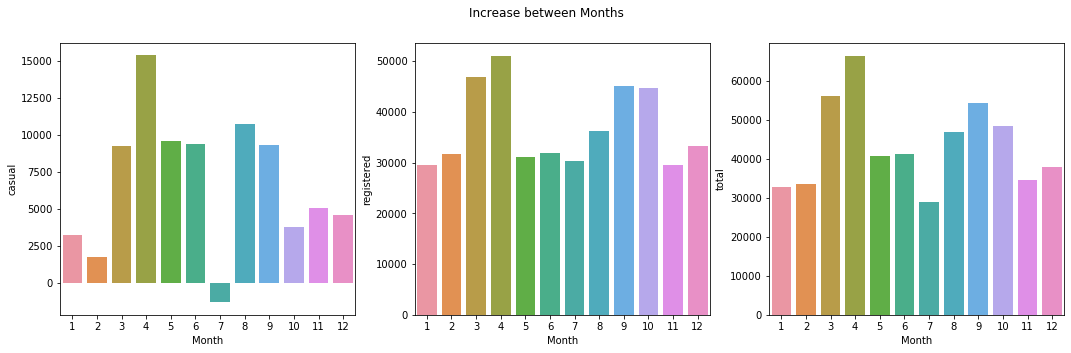

In [57]:
fig=plt.figure(figsize=(18,5))
plt.suptitle('Increase between Months')
ax1=fig.add_subplot(131)
sns.barplot(x=list(data.index),y=data['casual']).set_xlabel('Month')

ax2=fig.add_subplot(132)
sns.barplot(x=list(data.index),y=data['registered']).set_xlabel('Month')

ax3=fig.add_subplot(133)
sns.barplot(x=list(data.index),y=data['total']).set_xlabel('Month')

## 汇总不同年份，看随月份的变化
### 图1 非注册使用量、注册使用量、总使用量的平均值随月份的变化
每月注册/非注册用户和总体都呈现一致的分布，每年在5月-10月范围迎来峰值，春季是低谷
### 图2 温度、湿度和风速平均值随月份的变化
湿度和风速变化不大，温度在夏天较高

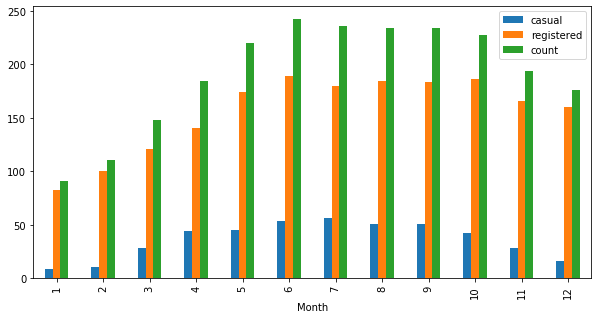

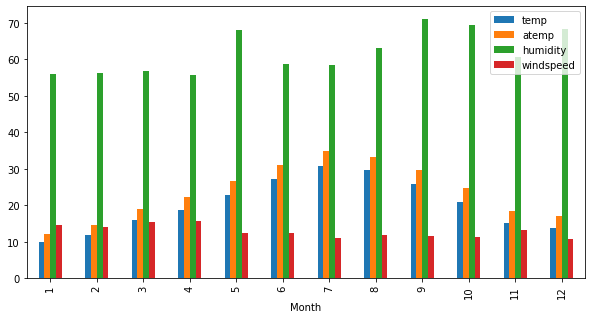

In [13]:

df.groupby(by=['Month']).mean().loc[:,['casual','registered','count']].plot(kind='bar',figsize=(10,5))

df.groupby(by=['Month']).mean().loc[:,['temp','atemp','humidity','windspeed']].plot(kind='bar',figsize=(10,5))


### 不同季节的平均使用量
#### 注册用户春天使用较少，非注册用户春天和冬天使用较少

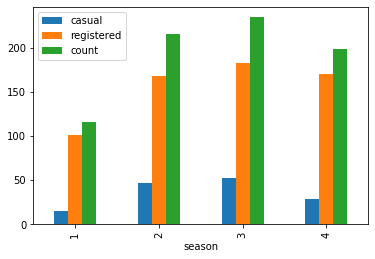

In [14]:
df.groupby('season').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 对比节假日用户平均每小时使用量
#### 注册用户偏爱工作日，非注册用户偏爱节假日，但是总量差不多（工作日略多一点）

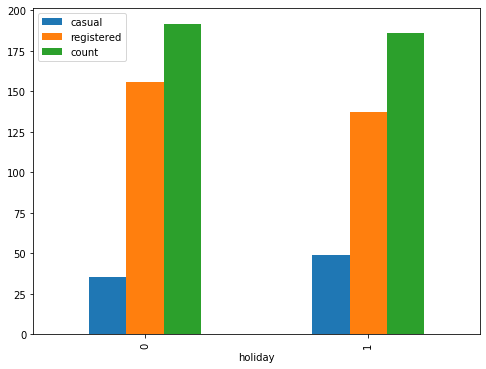

In [15]:
df.groupby('holiday').mean().loc[:,['casual','registered','count']].plot(kind='bar',figsize=(8,6))

### 不同天气状态下用户的平均使用情况
#### 4为大雨或大雪，但只有一个数据点，不可靠
#### 可见天气状态变差，使用量都减少

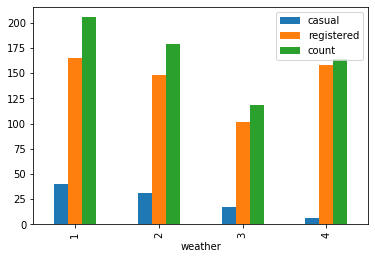

In [16]:
df.groupby('weather').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 体感温度分箱后可视化
#### 使用量随温度上升而增加，即便是高温天气

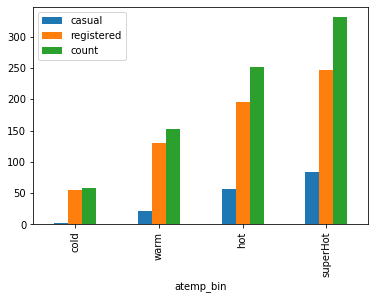

In [17]:
df['atemp_bin']=pd.cut(df.atemp,bins=[-1,9,27,35,50],right=True,labels=['cold','warm','hot','superHot'])

df.groupby('atemp_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 湿度分箱后可视化
#### 越干燥，使用量越大，与体感温度一致

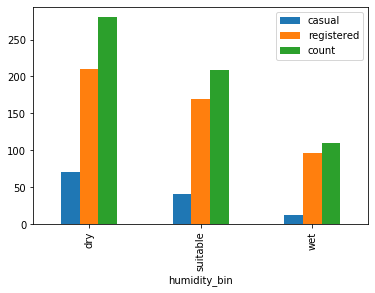

In [18]:
df['humidity_bin']=pd.cut(df.humidity,bins=[-1,30,80,100],right=True,labels=['dry','suitable','wet'])

df.groupby('humidity_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 风速分箱后可视化
#### 0-2级，3-5级，6-7级
#### 风速的影响不大

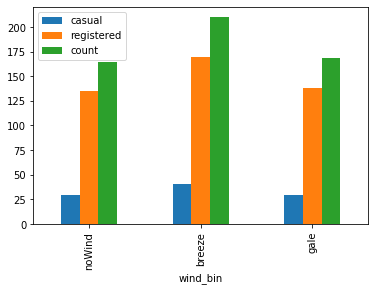

In [19]:
df['wind_bin']=pd.cut(df.windspeed,bins=[-1,11,38,61],right=True,labels=['noWind','breeze','gale'])

df.groupby('wind_bin').mean().loc[:,['casual','registered','count']].plot(kind='bar')

### 特征筛选与建模预测

#### 选出想要的特征，并数值化

In [22]:
cols=['season','holiday','weather','count','Month','Hour','atemp_bin','humidity_bin','wind_bin']
data=df.loc[:,cols]
data=pd.get_dummies(data,columns=['atemp_bin','humidity_bin','wind_bin'])

#### seaborn展示相关系数热图

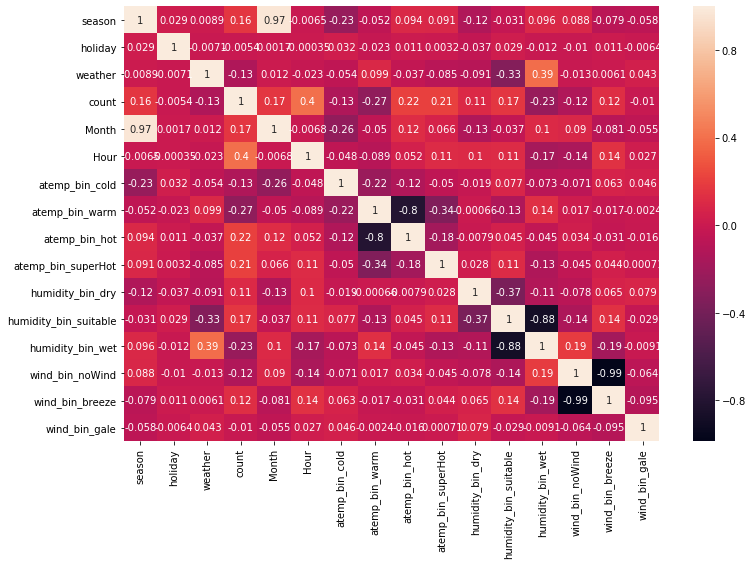

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

#### 分割数据为训练数据和预测数据

In [31]:
X=data.drop(columns='count',axis=1).values
y=data['count'].values

from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

### 决策树

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)

### 评价方法：mse，mae，r2

#### r2：1-SSE/(SSE+SSR)=SSR/(SSR+SSE)，衡量特征对因变量的解释程度，可以避免量纲不同的影响，越大越好
#### 代码实现：r2=1-MSE(y_pred,y_test)/np.var(y_test)
#### SSR：回归平方和，预测值与平均值之差的平方，求和。越大越好，表示数据分布广。
#### SSE：残差平方和，预测值与真实值之差的平方，求和。越小越好，反应预测偏离真实值多少。
#### SST=SSR+SSE：离差平方和，真实值与平均值之差的平方，求和

#### 自定义函数：平均绝对百分误差
一般小于20%为好

In [52]:
def cal_error(real,predict):
    return (abs(real-predict)/real).mean()

#### 自定义函数：打印各种得分

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def print_score(y_true,y_pred):
    print('MSE is %.3f,MAE is %.3f,MAPE is %.3f%%,R2 is %4f'%(
        mean_squared_error(y_true,y_pred),mean_absolute_error(y_true,y_pred),cal_error(y_true,y_pred)*100,r2_score(y_true,y_pred)))

In [55]:
print_score(y_test,pred)

mse is 15339.142,mae is 80.608,mape is 94.188%,r2 is 0.541759


### 线性回归
这个不行

In [73]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize=True)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print_score(y_test,pred)

MSE is 24083.075,MAE is 115.324,MAPE is 350.452%,R2 is 0.280543


### 随机森林
各评分比决策树都要好

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print_score(y_test,pred)

MSE is 12947.463,MAE is 75.581,MAPE is 92.139%,R2 is 0.613208


### xgboost
比随机森林又要好，除了MAPE

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
import numpy as np

In [58]:
reg=XGBRegressor()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print_score(y_test,pred)

[17:57:11] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE is 11200.891,MAE is 72.582,MAPE is 106.672%,R2 is 0.665385


#### learning_curve

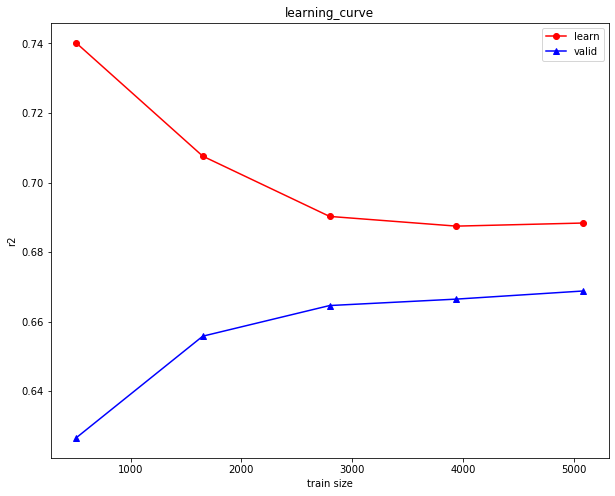

[0.62649028 0.65579246 0.66460331 0.6664557  0.6687934 ]


In [49]:
model_1=XGBRegressor()

train_sizes, train_scores, valid_scores =learning_curve(model_1,X_train,y_train,cv=3,scoring='r2',n_jobs=-1,random_state=43,shuffle=True)

# 2个曲线收敛到较小值，特征对因变量的解释性较差
plt.figure(figsize=(10,8))
plt.plot(train_sizes,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(train_sizes,valid_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('learning_curve')
plt.legend()
plt.show()
print(valid_scores.mean(axis=1))

#### 单项调优

In [59]:
from sklearn.model_selection import validation_curve

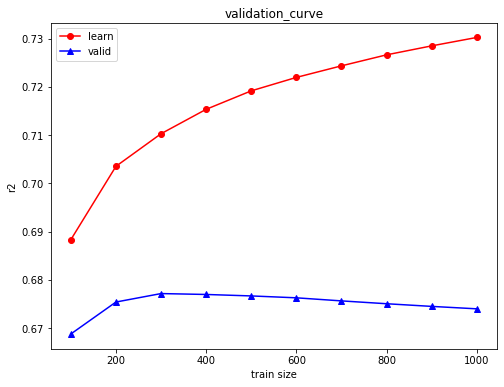

[0.6687934  0.67541449 0.67716829 0.67698261 0.67667896 0.67628818
 0.67565088 0.67506238 0.67451126 0.67400682]


In [60]:
# n_estimators最佳：300
param_range=range(100,1001,100)
train_scores, test_scores=validation_curve(XGBRegressor(),X_train,y_train,'n_estimators',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

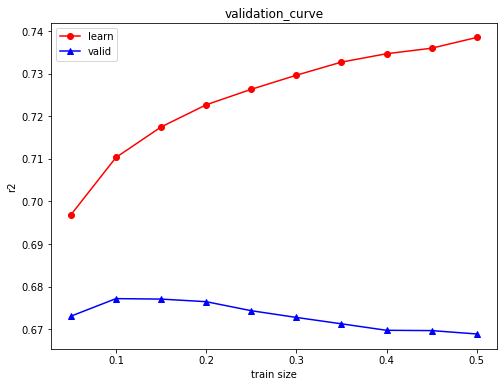

[0.67304809 0.67716829 0.67706168 0.67645089 0.67433421 0.67275491
 0.67125539 0.66973529 0.66966482 0.66887136]


In [61]:
# learning_rate最佳：0.1
param_range=np.arange(0.05,0.51,0.05)
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'learning_rate',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

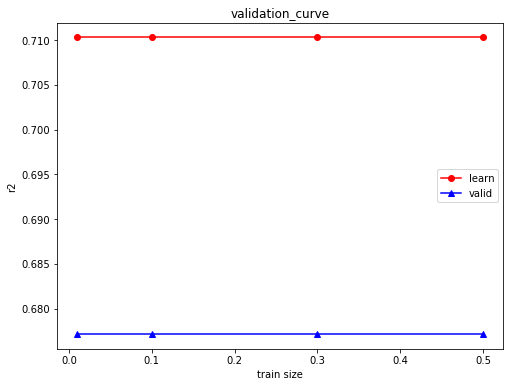

[0.67716829 0.67716829 0.67716829 0.67716829]


In [62]:
# gamma：无影响
param_range=[0.01,0.1,0.3,0.5]
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'gamma',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

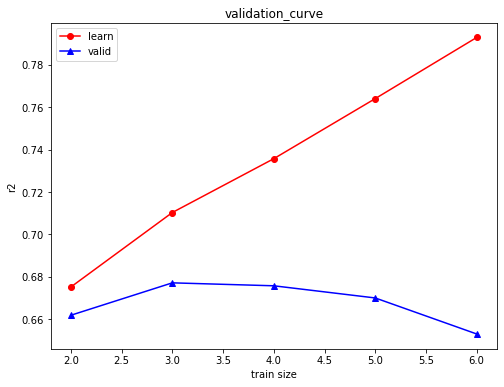

[0.66190102 0.67716829 0.67578179 0.6700476  0.65307648]


In [63]:
# max_depth:3
param_range=range(2,7)
train_scores, test_scores=validation_curve(XGBRegressor(n_estimators=300),X_train,y_train,'max_depth',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

### 调优前后对比
#### 参数：只改变一个n_estimators=300
#### 评分：有所改善
MSE is 11200.891,MAE is 72.582,MAPE is 106.672%,R2 is 0.665385<br/>
MSE is 10810.777,MAE is 70.887,MAPE is 99.355%,R2 is 0.677039

In [64]:
model_xgbRe=XGBRegressor(n_estimators=300)
model_xgbRe.fit(X_train,y_train)
y_pred=model_xgbRe.predict(X_test)
print_score(y_test,y_pred)

[18:06:49] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE is 10810.777,MAE is 70.887,MAPE is 99.355%,R2 is 0.677039


### SVR
r2评分太小，没有调优的价值

In [65]:
from sklearn.svm import SVR

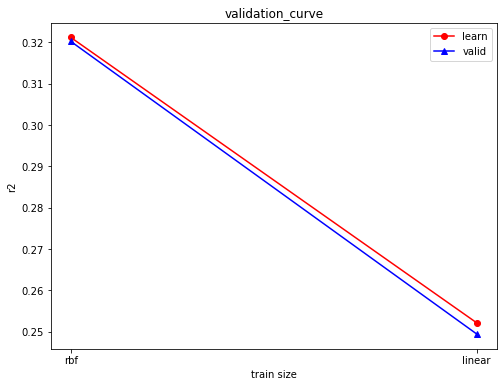

[0.3202115  0.24942324]


In [69]:
# kernel:rbf
param_range=['rbf','linear']
train_scores, test_scores=validation_curve(SVR(),X_train,y_train,'kernel',param_range,cv=3,n_jobs=-1,scoring='r2')

plt.figure(figsize=(8,6))
plt.plot(param_range,train_scores.mean(axis=1),'ro-',label='learn')
plt.plot(param_range,test_scores.mean(axis=1),'b^-',label='valid')
plt.xlabel('train size')
plt.ylabel('r2')
plt.title('validation_curve')
plt.legend()
plt.show()
print(test_scores.mean(axis=1))

### K近邻
不错的表现

In [83]:
from sklearn.neighbors import KNeighborsRegressor

reg=KNeighborsRegressor(n_neighbors=20)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 11251.293,MAE is 72.194,MAPE is 99.738%,R2 is 0.663879


### Lasso
负值，还不如随机

In [85]:
from sklearn.linear_model import Lasso

reg=Lasso(normalize=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 33484.352,MAE is 143.208,MAPE is 790.042%,R2 is -0.000311


### 多层感知机
表现一般

In [89]:
from sklearn.neural_network import MLPRegressor

reg=MLPRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)


MSE is 13154.684,MAE is 76.511,MAPE is 93.732%,R2 is 0.607017


### BaggingRegressor
还可以

In [90]:
from sklearn.ensemble import BaggingRegressor

reg=BaggingRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 13515.896,MAE is 76.911,MAPE is 93.545%,R2 is 0.596226


### GradientBoostingRegressor
这个不错

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 11194.918,MAE is 72.546,MAPE is 107.050%,R2 is 0.665563


### LGBMRegressor
惊艳的表现：秒速训练，各项评分均最佳

In [94]:
from lightgbm import LGBMRegressor
reg=LGBMRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 10709.667,MAE is 69.733,MAPE is 92.420%,R2 is 0.680060


### 网格搜索优化一下
#### 选择调节树的数量和L2正则化参数

In [109]:
params={'reg_lambda':[0.01,0.001,0.0001],'n_estimators':range(100,600,100)}
model=GridSearchCV(LGBMRegressor(),param_grid=params,scoring='r2',n_jobs=-1,cv=3)
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'n_estimators': range(100, 600, 100),
                         'reg_lambda': [0.01, 0.001, 0.0001]},
             scoring='r2')

In [110]:
model.best_params_

{'n_estimators': 100, 'reg_lambda': 0.01}

In [112]:
reg=LGBMRegressor(reg_lambda=0.01)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 10726.634,MAE is 70.024,MAPE is 93.914%,R2 is 0.679553


### 最佳模型
网格搜索出来的并非是最佳模型，可能是使用了cv吧

In [103]:
reg=LGBMRegressor(reg_lambda=0.0001)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print_score(y_test,y_pred)

MSE is 10673.144,MAE is 69.602,MAPE is 92.235%,R2 is 0.681151
